Lets First Import necessary modules.
xlrd is used to handling excel file with pandas.
and In matplotlib I am going to use style('fivethirtyeight')


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd
from matplotlib import style
style.use('fivethirtyeight')

reading data from wikipedia, Here we get a lot of stuff.

In [2]:
data_html= pd.read_html('https://en.wikipedia.org/wiki/Suicide_in_India#cite_note-9')

let's see Is there anything useful we got. Here I need no of suicide vs their reson


In [3]:
sucide_data =data_html[1] # what we need

I don't know why am I doing so much data shuffling... after taking what we want , we saved the data into local file using pickle so that we don't have to go to wikipedia.

In [6]:
sucide_data.to_pickle('sucide_data.pickle')

In [7]:
df= pd.read_pickle('sucide_data.pickle')
df.to_csv("D:/bluecube/sucide_data.csv")

then again I formatted data into csv [:( ]...now lets begin our actual work

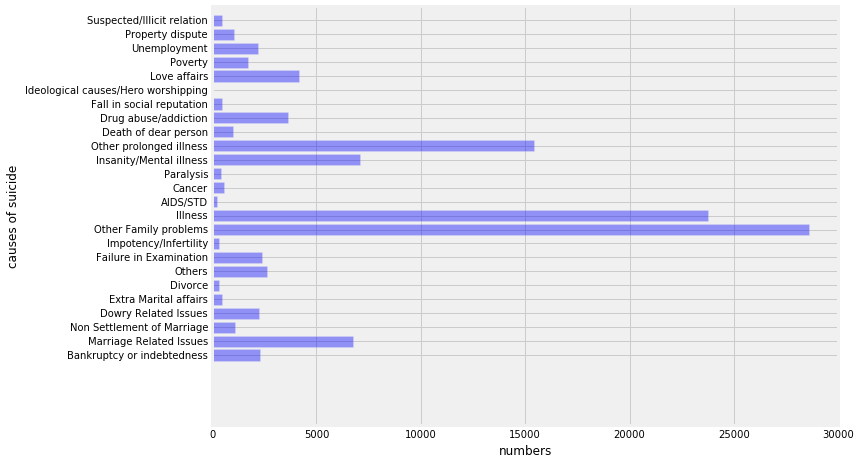

In [8]:
#we are going to plot a barplot. so extracting the values from the csv file.
df2= pd.read_csv('D:/bluecube/sucide_data.csv',header=None)
df3=df.ix[1:]  # indexinga and selecting 
cause= df[0].values   # creating a numpy array , that would be easy to handle -> df.values create a numpy array 
numbers= df[1].values # and same here 
#puff , now just plot 
fig, ax = plt.subplots(1,1, figsize=(10,7.5))

x= [int(num) for num in numbers[1:]]

y=[str(cau) for cau in cause[1:]]

y_pos = np.arange(len(y))

plt.barh(y_pos, x, align='center', alpha=0.4)

plt.yticks(y_pos, y)
plt.xlabel('numbers')
plt.ylabel('causes of suicide')
plt.show()
#and boom!

Now another dataset related to Human trafficking. (Data is obtained from gov. data portal)

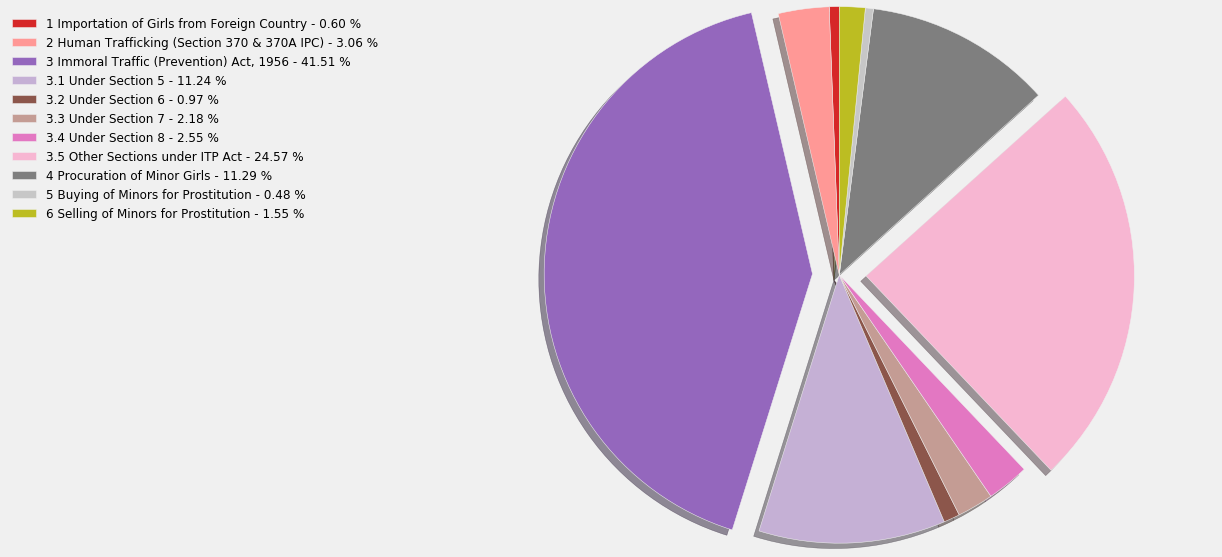

In [81]:
#Below is a pie chart related to Human trafficking 
trafficking=pd.read_csv('D:\Devotion of time\Data/trafficking.csv')

labels=[i for i in trafficking['Crime Head (Col.1)'].values ] # types of Human trafficking recorded 

size= trafficking['Total no. of Cases for Trial During the Year (Col.6) = (Col.2+3 - Col.4 - Col. 5)'].values 
# no of cases recoreded is represented with size

x_labels= labels[:len(labels)-1]  # A little bit of shuffling of data 

x_size = size[:len(size)-1] 

colors= ['#d62728', '#ff9896', '#9467bd', '#c5b0d5','#8c564b', 
        '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f','#c7c7c7', '#bcbd22'] 

explode = (0, 0,0.1,0,0,0,0,0.1,0,0,0)        

fig= plt.subplots(1,1, figsize=(12,9))

#making it bit good looking

percent = 100.*x_size/x_size.sum()

patches, texts=plt.pie(x_size, explode=explode, colors=colors,
         shadow=True, startangle=90)

labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x_labels, percent)]

plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(-0.1, 1.),
           fontsize=12)

plt.axis('equal')

plt.show()